# A thorough introduction to object-oriented Matplotlib - Part 1: Figures And Axes

There must be a million tutorials on matplotlib out there.
Most use Matplotlib's Pyplot interface, a stateful API, designed to look and feel like Matlab. It allows users to create simple graphs quickly and easily.

However, whenever the resulting figure needs to be manipulated and changed, users have to resort to Matplotlib's object-oriented user-interface which tends to be more verbose and low-level, but is also more explicit.
A result of these two APIs, lots of example code out there mixes the Pyplot- and the OOP-interface. This is even the case for Matplotlib's official tutorials on the Matplotlib website.

Because one API is stateful and the other isn't, and because it is often unclear why one or the other version is used, this can turn out to be very confusing.
For this reason, I decided to write this short into to Matplotlib's OOP-interface. I will try to stay as pure as possible.

## Matplotlib in general

Matplotlib is one of the oldest Python visualisation libraries. Its first version dates back to 2003. It pre-dates the evolution of the Grammar of Graphics, D3, interactive browser- and Javascript-based libraries and for that reason its default output can look a bit dated.
Matplotlib's APIs are often unpythonic, at times counterintuitive, and allow the user to do the same thing in many ways. Steps which are supposed to create similar outputs create slight differences from the way they are handled internally - and intransparently to the user. When this is the case, I will point it out.

Matplotlib is still worth learning. Matplotlib is well supported, it is ubiquitous in Python world and a little knowledge and insight will take you far.

This tutorial is here to help.

In [1]:
import matplotlib as mpl

Note that we are not importing pyplot at all.
There is no *import matplotlib.pyplot as plt* as in most tutorials.

In [2]:
%matplotlib inline

For this tutorial we inline all graphs in the notebook. For choice of backends and their differences see Part 3 - Backends.

## The most important illustration of the Matplotlib API

The best illustration of matplotlib's object hierarchy can be found in an old version of Matplotlib's documentation for version 1.5.

[Matplotlib 1.5](https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure)

![Matplotlib_Figure](./img/matplotlib_figure_object_hierarchy.PNG)



- Every Matplotlib plot is a *Figure*.
- Every Figure contains *one or more Axes*. Note the "e". *Axes* not *axis*.
- Every Axes contains *Axis*. Note the "i". Generally a *x-Axis* and *y-Axis*.
- On the x- and y-Axis we can plot different *Artists*, such a a 2d-lineplot and others, more on that later.

Let's create each elements of a *Figure* in turn using only the OOP-interface.

## Figure

Everything Matplotlib displays must be contained within a *Figure*. Creating a *Figure*-container is always the first step.

### Creating a Figure

In [3]:
import matplotlib.figure

Note that the submodule figure needs to be imported explicitely.

In [4]:
fig = matplotlib.figure.Figure()

*Figure* takes a number of arguments to set basic properties of the *Figure*-container at creation. However, these can also be set after the creation.
In order to see that parameters can be passed, who the full docstring for the figure using the ?-help function.

In [5]:
fig?

Type:           Figure
String form:    Figure(432x288)
File:           c:\miniconda3\envs\svass\lib\site-packages\matplotlib\figure.py
Docstring:     
The top level container for all the plot elements.

The Figure instance supports callbacks through a *callbacks* attribute
which is a `.CallbackRegistry` instance.  The events you can connect to
are 'dpi_changed', and the callback will be called with ``func(fig)`` where
fig is the `Figure` instance.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple figure images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor

#### Figure parameters

So the parameters are
- figsize
- dpi
- facecolor
- edgecolor
- linewidth
- frameon
- subplotpars
- tight_layout
- constrinaed_layout

#### Configuring *Figure* at creation

When passing these parameters are creation, we can quickly set a basic configuration for the figure.

In [6]:
fig = matplotlib.figure.Figure(figsize=(5,5), facecolor='red', edgecolor='blue', linewidth=2)

#### Configuring *Figure* with setters and getters

Alternatively we can create *Figure* with default values, and set the values using the *Figure*'s setter methods.

In [7]:
fig.set_facecolor("red")
fig.set_edgecolor("blue")
fig.set_tight_layout(False)

Not all parameter attributes have a setter method. E.g. there is no `fig.set_linewidth`, but there are other setters for attributes which cannot be set at creation time.

#### Aside 1: Matplotlib's setters and getters

Unlike other OOP-languages, *pythonic* Python generally does not use getter- and setter- methods. Instead *properties* are widely used. A pythonic programmer would expect to be able to set the properties for a Figure like this:

`fig.facecolor = "red"` THIS DOES NOT WORK!

Unfortunately this is not how the Matplotlib OOP-interface works. It DOES use getters and setters as above for MOST properties, but then again - not all.
So remember, when using the OOP-interface, properties are set using setter functions, not assignments and assignments cause often weird error messages.

To make things even more confusing the Pyplot interface often DOES often ue function names which are similiar to the OOP-interface names, but leaves out the getter and setter prefix.
For example, to set the range of the x-axis in an Axes using the OOP-interface, you call:

`ax.set_xlim(0,10)`

whereas in the Pyplot interface you call:

`plt.xlim(0,10)`



### Constitutents of an object

A number of objects in matplotlib, have a generic method listing the objects consituents. This turns out to be rather useful, when exploring the state and makup of a figure. The method is called *get_children*.

In [8]:
fig.get_children()

The figure we created currently consists of only a *patch*-object

### Showing the Figure

Note that an empty figure - a figure which does not contain any *Axes* - cannot be displayed (in Jupyter).

In [9]:
fig

<Figure size 360x360 with 0 Axes>

This simply returns a description of the *Figure*-object.
We see that this *Figure* references 0 *Axes*. The figure is empty.

We can verify this by calling the *Figure*'s get_axes method.

In [10]:
fig.get_axes()

[]

This does not prevent us from configuring the *Figure* a bit more. We already set the facecolor and the edgecolor properties.
We can set a *Figure*-title.

Note that some properties are set by *setter*-methods as above, others are set by calling direct methods.
Generally the Matplotlib-API feels rather unpythonic in its use of getters and setters and using methods to set properties.

A more pythonic interface would be something like:

`fig.title = "My Figure Title"` THIS DOES NOT WORK!

But unfortunately, this is not how it works.
Instead we need to call the *suptitle*-method on the Figure-object. Note that is is not a *setter*-method like the ones above.

In [11]:
fig.suptitle("My Figure Title")

Text(0.5, 0.98, 'My Figure Title')

The Figure-title can be positioned, manipulated, the font can be changed, etc by providing parameters to this methods.
The tab-extension help is again of no uses, since it only references *kwargs, but again the ?-help is our friend for a view of the parameters.

In [12]:
fig.suptitle?

Signature: fig.suptitle(t, **kwargs)
Docstring:
Add a centered title to the figure.

Parameters
----------
t : str
    The title text.

x : float, default 0.5
    The x location of the text in figure coordinates.

y : float, default 0.98
    The y location of the text in figure coordinates.

horizontalalignment, ha : {'center', 'left', right'}, default: 'center'
    The horizontal alignment of the text relative to (*x*, *y*).

verticalalignment, va : {'top', 'center', 'bottom', 'baseline'}, default: 'top'
    The vertical alignment of the text relative to (*x*, *y*).

fontsize, size : default: :rc:`figure.titlesize`
    The font size of the text. See `.Text.set_size` for possible
    values.

fontweight, weight : default: :rc:`figure.titleweight`
    The font weight of the text. See `.Text.set_weight` for possible
    values.


Returns
-------
    text
        The `.Text` instance of the title.


Other Parameters
----------------
fontproperties : None or dict, optional
    A dict of fo

In [13]:
fig.get_children()

 Text(0.5, 0.98, 'My Figure Title')]

## Axes (not Axis!)

For a *Figure* to be displayed in a notebook, it needs to have at least one Axes.
Several *Axes* can be added to a *Figure*, which will be displayed as subplots to this figure.

### Adding Axes

An Axes can be added using the add_axes commend. The add_axes command takes as input a rectangle (a tuple of [left, bottom, width, height] ) which describes where exactly the new axes should be positioned within the *Figure*, expressed as a fraction of the *Figure* height and width.

This can turn out to be a very tricky and complex way to position an Axes within a *Figure*.

In [14]:
fig.add_axes([0.3, 0.3, 0.3, 0.3], label="Direct Position Axes")

### Displaying Figure and Axes

Since we added an Axes to the Figure, the Figure is no longer empty and can now be displayed on the backend.

All parameters set on the Figure-instance earlier are now visible, e.g. the blue edges, the red background and the Figure title.

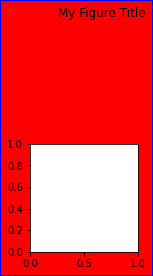

In [15]:
fig

The Figure and Axes look funny and misplaced. This is because we have mispositioned the new Axes within the Figure when we were providing the parameters for the the rectangle-argument for add_axes.
It turns out positioneing the Axes via absoute positioning via the 'rectangle' methid above is too tricky.

### Adding A Subplot

A better method to add an Axes to a Figure is using the add_subplot method. 
The difference between add_axes and add_subplot is that add_subplot takes care of the positioning of the axes in the Figure for us.

Instead of requiring a position as 'a fraction of the figure', add_subplot takes a generic position within the Figure, expressed as a row and column parameter.

We need to remove the funny axes from the figure:

In [16]:
def remove_all_axes(fig):
    for ax in fig.get_axes():
        ax.remove()

In [17]:
remove_all_axes(fig)
fig

<Figure size 360x360 with 0 Axes>

The figure no longer has any Axes.

Let's add a subplot.

In [18]:
fig.get_axes()

[]

An Axis is added with the add_sub_plot command.

In [19]:
fig.add_subplot()

The add_subplot command returns a reference to an Axes in the figure. 
There are a few ways to get a reference to this Axes instance.

In [20]:
ax = fig.add_subplot(1,2,1)
ax

In [21]:
fig.get_axes()

We see that the Figure contains a collection of Axes.

add_subplot takes as positional parameters

- a row identifier
- a column identifier
- an index reference

This can be provided explicitly, or shortened as a 3-digit number.

When called without parameters, it *defaults to 111*.

In [22]:
ax = fig.get_axes()[0]

In [23]:
ax.numCols, ax.numRows

(1, 1)

Let's start from scratch removing all axes and specifying the subplot explicitly by providing parameters.

In [24]:
remove_all_axes(fig)
fig.add_subplot(1, 1, 1)
# this can be shortened by matplotlib convention to fig.add_subplot(111)

It gives us a warning, explaining that an axes with this reference has already been added. This is because add_subplot() without parameters defaults to "111".

In [25]:
fig.add_subplot?

Signature: fig.add_subplot(*args, **kwargs)
Docstring:
Add an `~.axes.Axes` to the figure as part of a subplot arrangement.

Call signatures::

   add_subplot(nrows, ncols, index, **kwargs)
   add_subplot(pos, **kwargs)
   add_subplot(ax)
   add_subplot()

Parameters
----------
*args
    Either a 3-digit integer or three separate integers
    describing the position of the subplot. If the three
    integers are *nrows*, *ncols*, and *index* in order, the
    subplot will take the *index* position on a grid with *nrows*
    rows and *ncols* columns. *index* starts at 1 in the upper left
    corner and increases to the right.

    *pos* is a three digit integer, where the first digit is the
    number of rows, the second the number of columns, and the third
    the index of the subplot. i.e. fig.add_subplot(235) is the same as
    fig.add_subplot(2, 3, 5). Note that all integers must be less than
    10 for this form to work.

    If no positional arguments are passed, defaults to (1, 1,

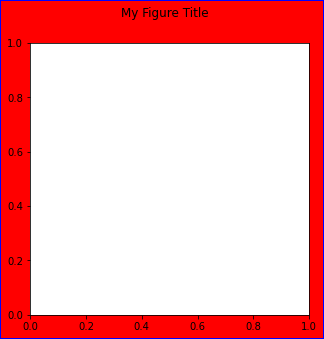

In [26]:
fig

Let's set some properties on the Axes object, to show how it differs from the Figure object.

In [27]:
# Get reference to the first axes in the axes colletion.
ax1 = fig.get_axes()[0]

In [28]:
ax1.set_facecolor('green')
ax1.set_title("First Axes")
ax1.grid(True)

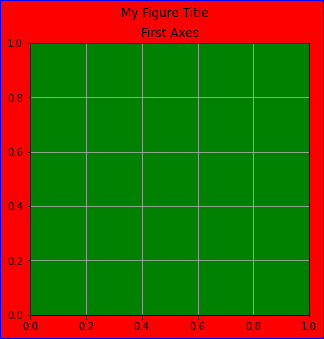

In [29]:
fig

We add a second Axes to this Figure. 
We want to show it underneath this Axes, so it will be in row 2, column 1, with the index 2.

In [30]:
ax2 = fig.add_subplot(2, 1, 2)
ax2

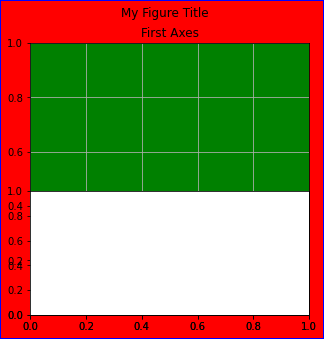

In [31]:
fig

And set some attributes on the second Axes.

In [32]:
ax2.set_facecolor('yellow')
ax2.set_title("Second Axes")
ax2.grid(True)

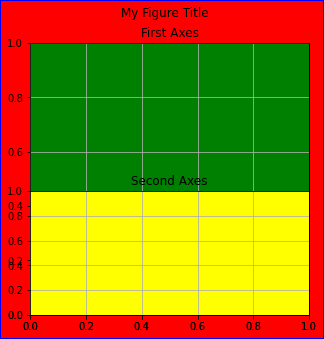

In [33]:
fig

There are some issues.
The Second Axes is now on top of the First Axes.

We remove them and try a differrent way.

In [34]:
remove_all_axes(fig)
fig

<Figure size 360x360 with 0 Axes>

Using the subplots (note the s) method, we can add several Axes/subplots to the figure in one step.
An effect of this approach is that the subplots are more sensibly positioned in the *Figure*.

In [35]:
ax1, ax2 = fig.subplots(2,1)

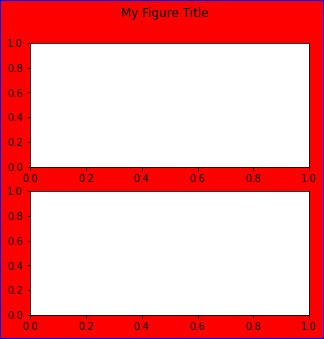

In [36]:
fig

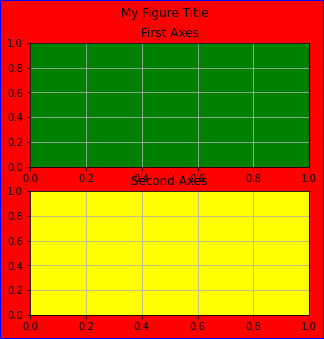

In [37]:
ax1.set_facecolor('green')
ax1.set_title("First Axes")
ax1.grid(True)
ax2.set_facecolor('yellow')
ax2.set_title("Second Axes")
ax2.grid(True)
fig

In [38]:
fig.tight_layout(pad=3)

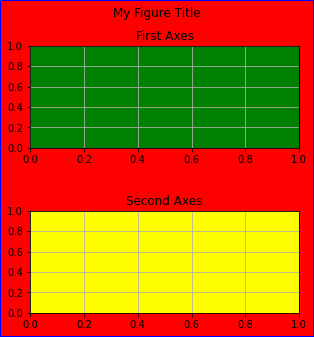

In [39]:
fig

In [40]:
ax = fig.get_axes()[1]

In [41]:
fig.delaxes(ax)

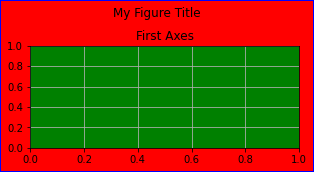

In [42]:
fig

In [43]:
ax1

In [44]:
fig.get_axes()

## Working with an Axe

On the axe we can draw our graph. We can specify x-axis and y-axis, what we want to chart.

To illustrate we need some sample data.

In [49]:
x = list("abcdefghij")
x

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [50]:
y = list(range(10))
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
ax1.bar(x=x, height=y)

<BarContainer object of 10 artists>

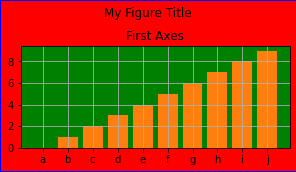

In [52]:
fig

In [53]:
ax1.bar(x=x, height=[n*2 for n in y])

<BarContainer object of 10 artists>

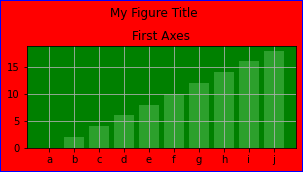

In [54]:
fig

In [55]:
ax1.get_children()

 Text(0.5, 1.0, 'First Axes'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [56]:
ax1.set_alpha(1)

In [57]:
ax1.get_alpha()

1

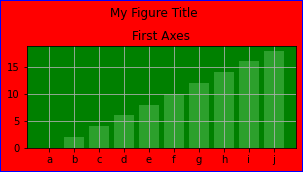

In [58]:
fig

In [59]:
fig.get_children()

 Text(0.5, 0.98, 'My Figure Title')]

In this Part 1 of this Matplotlib OOP-introduction we focused on the top level Matplotlib object-hierarchy and the relationship between Figure and Axes.
In Part 2 we will look at Axes more closely, and start plotting several *Artists* on the same Axes and using different x-axis and y-axis on the same Axis or sharing x- and y-axis between Axes in the same Figure.